In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 117 entries, Province/State to 5/13/20
dtypes: float64(2), int64(113), object(2)
memory usage: 244.2+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 117 entries, Province/State to 5/13/20
dtypes: float64(2), int64(113), object(2)
memory usage: 244.2+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


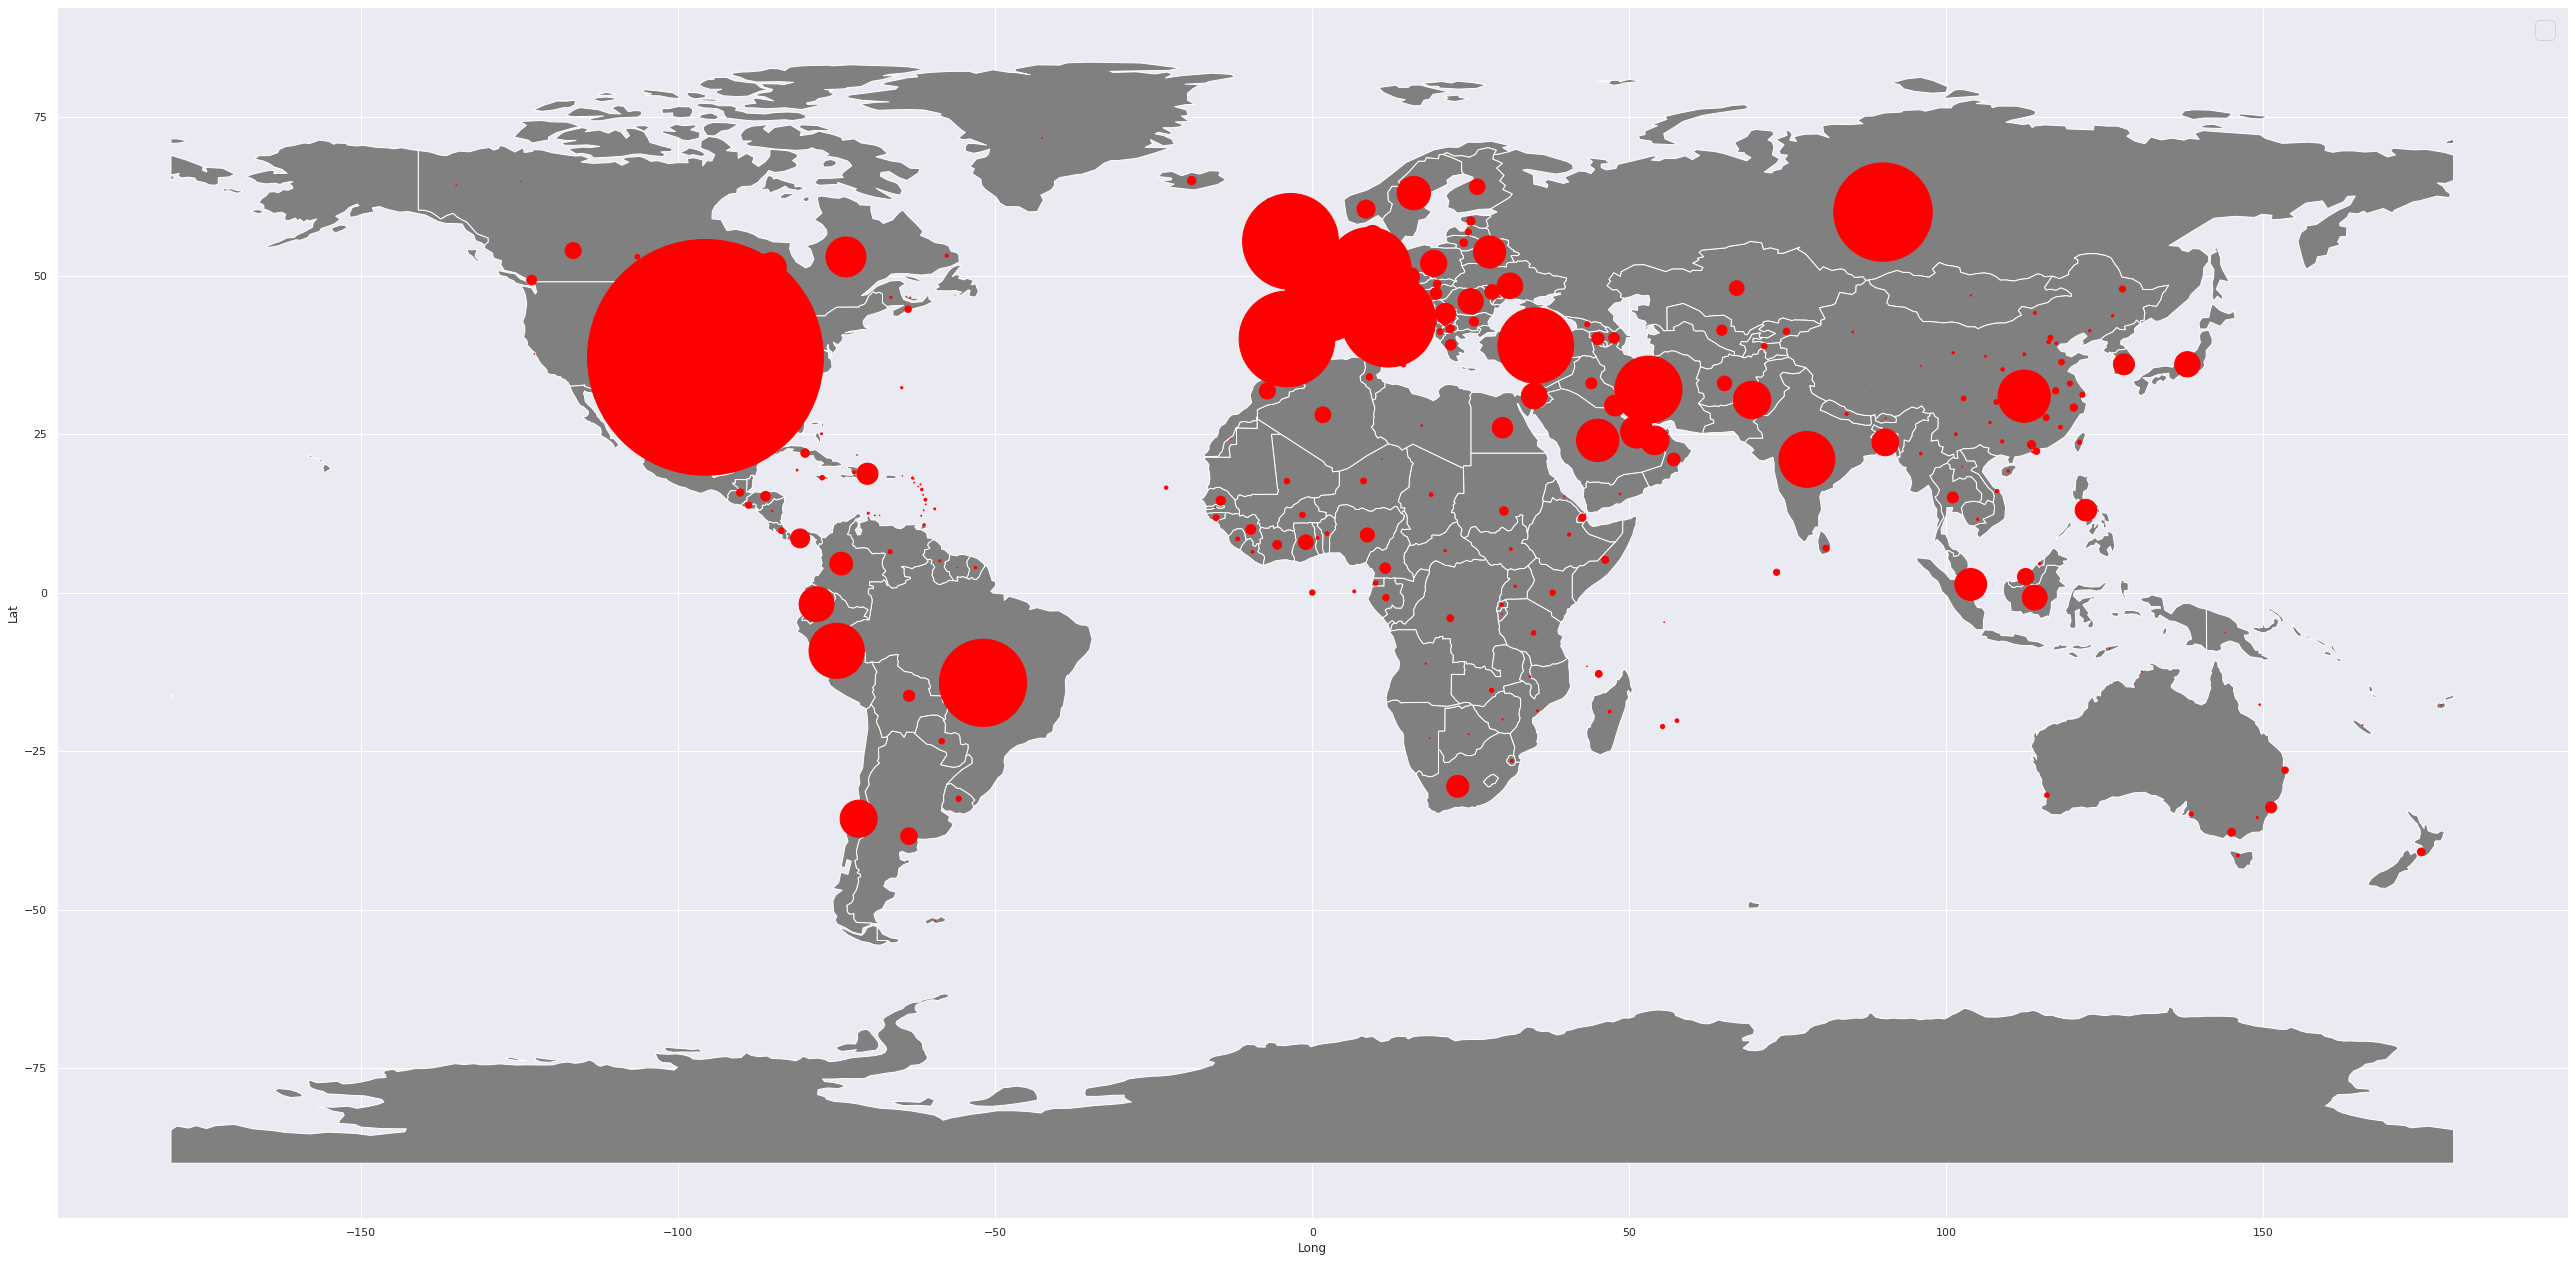

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/9/20,480,212534,103031,133952,143300,79127,61685,9610,56148,513
5/10/20,501,216169,105186,136166,144400,79167,64957,9632,56327,517
5/11/20,517,232733,106587,137139,145617,79198,67384,9670,56835,523
5/12/20,520,230287,109039,138980,147200,79222,72597,9695,57898,532


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/9/20,780,8282,967,16,784,1830,9882,490,116,1754
5/10/20,792,8448,1052,16,889,1972,10347,502,116,1766
5/11/20,801,8616,1114,16,958,2100,10634,505,116,1783
5/12/20,804,8783,1199,25,998,2080,10900,507,116,1804


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/9/20,6,237,24,5,17,108,385,9,8,74
5/10/20,7,244,26,5,17,108,388,9,8,77
5/11/20,7,249,26,5,18,116,393,9,8,77
5/12/20,7,252,27,8,20,121,402,9,8,78


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/9/20,780,8282,967,16,784,1830,9882,490,116,1754
5/10/20,792,8448,1052,16,889,1972,10347,502,116,1766
5/11/20,801,8616,1114,16,958,2100,10634,505,116,1783
5/12/20,804,8783,1199,25,998,2080,10900,507,116,1804


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/9/20,6,237,24,5,17,108,385,9,8,74
5/10/20,7,244,26,5,17,108,388,9,8,77
5/11/20,7,249,26,5,18,116,393,9,8,77
5/12/20,7,252,27,8,20,121,402,9,8,78


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/9/20,1.009056,1.026270,1.074444,1.0000,1.056604,1.033315,1.053968,1.000000,1.0,1.007467
5/10/20,1.015385,1.020043,1.087901,1.0000,1.133929,1.077596,1.047055,1.024490,1.0,1.006842
5/11/20,1.011364,1.019886,1.058935,1.0000,1.077615,1.064909,1.027738,1.005976,1.0,1.009626
5/12/20,1.003745,1.019383,1.076302,1.5625,1.041754,0.990476,1.025014,1.003960,1.0,1.011778


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,89,92,92,92,92,92,93,93,94,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,82,82,82,83,84,84,84,85,85,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,991,998,1007,1008,1011,1018,1019,1020,1024,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,8613,8959,9456,10051,10495,11063,11613,12272,12930,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,755,761,765,773,780,792,801,804,815,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,1685,1703,1729,1741,1754,1766,1783,1804,1810,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,8480,8807,9095,9376,9882,10347,10634,10900,11196,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,587,633,695,742,784,889,958,998,1037,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,133,138,138,141,141,144,144,144,153,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251,256], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,89,92,92,92,92,92,93,93,94,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,82,82,82,83,84,84,84,85,85,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,755,761,765,773,780,792,801,804,815,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,1685,1703,1729,1741,1754,1766,1783,1804,1810,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,8480,8807,9095,9376,9882,10347,10634,10900,11196,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,587,633,695,742,784,889,958,998,1037,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,133,138,138,141,141,144,144,144,153,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,38,38,38,38,39,39,39,39,39,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,763,798,832,900,967,1052,1114,1199,1342,POINT (-90.23080 15.78350)


In [38]:
len(temp)

21

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'5/12/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,5/12/20,5/13/20
0,NaN,Dominican Republic,10900,11196
1,NaN,Panama,8783,8944
2,NaN,Honduras,2080,2255
3,NaN,Cuba,1804,1810
4,NaN,Guatemala,1199,1342
5,NaN,El Salvador,998,1037
6,NaN,Costa Rica,804,815
7,NaN,Jamaica,507,509
8,NaN,Haiti,209,234
9,French Guiana,France,144,153


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,38,41,41,44,46,47,47,48,48,51
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,358,378,397,407,428,445,463,479,493,509
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,7,8
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,69,69,69,73,74,74,77,77,78,79
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,346,354,362,373,380,385,388,393,402,409
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,13,14,15,15,16,17,17,18,20,20
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [49]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251,256], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,7,8
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,69,69,69,73,74,74,77,77,78,79
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,346,354,362,373,380,385,388,393,402,409
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,13,14,15,15,16,17,17,18,20,20
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,19,19,21,23,24,24,26,26,27,29


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'5/12/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,5/12/20,5/13/20
0,NaN,Dominican Republic,402,409
1,NaN,Panama,252,256
2,NaN,Honduras,121,123
3,NaN,Cuba,78,79
4,NaN,Guatemala,27,29
5,NaN,El Salvador,20,20
6,NaN,Haiti,16,18
7,Sint Maarten,Netherlands,15,15
8,NaN,Bahamas,11,11
9,NaN,Jamaica,9,9


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,15,16,16,16,16,19,19,19,19,19
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,25,26,26,26,31,37,37,39,39,41
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,46,47,47,53,53,57,57,57,57,65
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,14,16,16,16,16,16,16,16,16,16
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,1807,2013,2148,2300,2424,2569,2705,2825,2971,3133
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,399,413,428,445,461,480,501,517,520,527
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,876,954,1001,1031,1078,1140,1193,1229,1277,1326
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,13,14,14,14,14,14,15,15,15,15
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1771,1905,1960,2064,2286,2584,2763,2870,3221,3221
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,180,205,219,252,257,276,293,325,349,374


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,15,16,16,16,16,19,19,19,19,19
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,25,26,26,26,31,37,37,39,39,41
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,46,47,47,53,53,57,57,57,57,65
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,399,413,428,445,461,480,501,517,520,527
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,876,954,1001,1031,1078,1140,1193,1229,1277,1326
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,1771,1905,1960,2064,2286,2584,2763,2870,3221,3221
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,180,205,219,252,257,276,293,325,349,374
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,100,100,111,112,119,119,122,122,122,124
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,29,29,29,30,30,30,30,30,30,30
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,79,79,86,90,101,104,110,111,120,121


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'5/12/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,5/12/20,5/13/20
0,NaN,Panama,6021,6067
1,NaN,Dominican Republic,3221,3221
2,NaN,Cuba,1277,1326
3,NaN,Costa Rica,520,527
4,NaN,El Salvador,349,374
5,NaN,Honduras,211,237
6,French Guiana,France,122,124
7,NaN,Guatemala,120,121
8,NaN,Jamaica,100,113
9,NaN,Trinidad and Tobago,107,107


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
1,Bahamas,0,0,0,0,0,0,0,0,0,...,83,89,92,92,92,92,92,93,93,94
2,Barbados,0,0,0,0,0,0,0,0,0,...,82,82,82,82,83,84,84,84,85,85
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,742,755,761,765,773,780,792,801,804,815
4,Cuba,0,0,0,0,0,0,0,0,0,...,1668,1685,1703,1729,1741,1754,1766,1783,1804,1810
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,8235,8480,8807,9095,9376,9882,10347,10634,10900,11196
6,El Salvador,0,0,0,0,0,0,0,0,0,...,555,587,633,695,742,784,889,958,998,1037
7,French Guiana,0,0,0,0,0,0,0,0,0,...,133,133,138,138,141,141,144,144,144,153
8,St Martin,0,0,0,0,0,0,0,0,0,...,38,38,38,38,38,39,39,39,39,39
9,Guatemala,0,0,0,0,0,0,0,0,0,...,730,763,798,832,900,967,1052,1114,1199,1342


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,7,8
4,Cuba,0,0,0,0,0,0,0,0,0,...,69,69,69,73,74,74,77,77,78,79
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,346,354,362,373,380,385,388,393,402,409
6,El Salvador,0,0,0,0,0,0,0,0,0,...,13,14,15,15,16,17,17,18,20,20
7,French Guiana,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,19,19,21,23,24,24,26,26,27,29


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,15,16,16,16,16,19,19,19,19,19
1,Bahamas,0,0,0,0,0,0,0,0,0,...,25,26,26,26,31,37,37,39,39,41
2,Barbados,0,0,0,0,0,0,0,0,0,...,46,47,47,53,53,57,57,57,57,65
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,399,413,428,445,461,480,501,517,520,527
4,Cuba,0,0,0,0,0,0,0,0,0,...,876,954,1001,1031,1078,1140,1193,1229,1277,1326
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,1771,1905,1960,2064,2286,2584,2763,2870,3221,3221
6,El Salvador,0,0,0,0,0,0,0,0,0,...,180,205,219,252,257,276,293,325,349,374
7,French Guiana,0,0,0,0,0,0,0,0,0,...,100,100,111,112,119,119,122,122,122,124
8,St Martin,0,0,0,0,0,0,0,0,0,...,29,29,29,30,30,30,30,30,30,30
9,Guatemala,0,0,0,0,0,0,0,0,0,...,79,79,86,90,101,104,110,111,120,121


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(75, 21)

In [75]:
recovered_camcar_all.shape

(75, 21)

In [76]:
deaths_camcar_all.shape

(75, 21)

In [77]:
active_camcar_all.shape

(75, 21)